# POSTTEST 8
# Deep Learning
# Import modul yang di butuhkan

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as tfds
import numpy as np

# Load data set dan membagi data nya menjadi 2

In [14]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

print(f'panjang x train : {len(x_train)}',
f'panjang y train : {len(y_train)}',
f'panjang x test : {len(x_test)}',
f'panjang y test : {len(y_test)}')

panjang x train : 60000 panjang y train : 60000 panjang x test : 10000 panjang y test : 10000


# Encoding label dengan menggunakan library keras

In [15]:
num_class = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

# Melihat sampel gambar

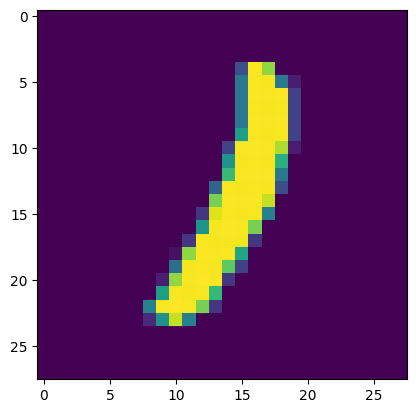

In [16]:
plt.imshow(x_train[78])

# Konversi gambar menjadi 784 x 1 dan normalisasikan nilai pixel

In [17]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [18]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Membuat sequential mode menggunakan 1 dense layer dengan fungsi aktivasi relu dan softmax

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu',input_dim=784),
    tf.keras.layers.Dense(num_class, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


# Compile model menggunakan optimizer adam,fungsi loss categorical crossentropy dan metrics accurary

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

# Training model dengan epoch 10 dan steps 1000

In [21]:
history = model.fit(
    x = x_train, y =y_train,
    validation_data=(x_test,y_test),
    epochs=10,
    steps_per_epoch=1000,
    verbose=1
)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4115 - accuracy: 0.8859 - val_loss: 0.2438 - val_accuracy: 0.9294
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2245 - accuracy: 0.9359 - val_loss: 0.2032 - val_accuracy: 0.9402
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1813 - accuracy: 0.9484 - val_loss: 0.1704 - val_accuracy: 0.9486
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1542 - accuracy: 0.9553 - val_loss: 0.1505 - val_accuracy: 0.9548
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1334 - accuracy: 0.9613 - val_loss: 0.1433 - val_accuracy: 0.9570
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1197 - accuracy: 0.9650 - val_loss: 0.1419 - val_accuracy: 0.9569
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1099 - accuracy: 0.9675 - val_loss: 0.1269 - val_accuracy:

# Melihat akurasi model

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1184745728969574
Test accuracy: 0.9646999835968018
